<a href="https://colab.research.google.com/github/tahseen25/Credit-card-Fraud-Detection/blob/main/K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


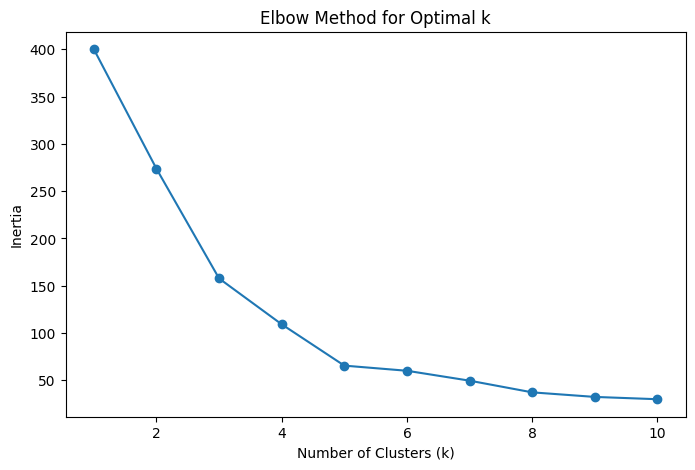

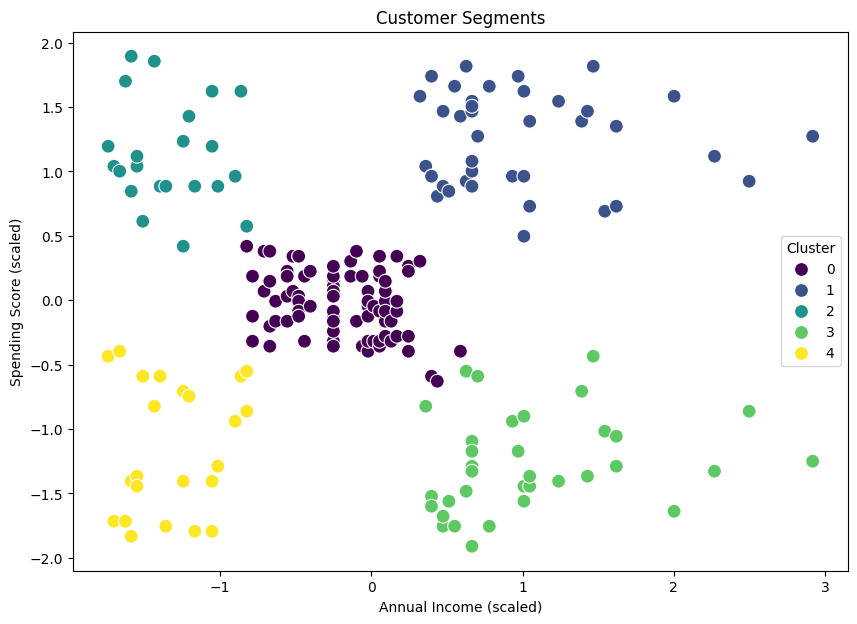

TypeError: agg function failed [how->mean,dtype->object]

In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 2: Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Step 3: Explore the dataset
print(data.head())
print(data.info())

# Step 4: Select relevant features
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]  # Example: Income and Spending Score

# Step 5: Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 6: Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 7: Train the K-means model with the optimal number of clusters (e.g., k=5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)
data['Cluster'] = kmeans.labels_

# Step 8: Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments')
plt.legend(title='Cluster')
plt.show()

# Step 9: Analyze the clusters
print(data.groupby('Cluster').mean())
